# Introduction to NumPy, Matplotlib, Pandas

This script gives an short overview of NumPy, Matplotlib and Pandas. 
* NumPy gives access to a new datatype, "array" which is useful when doing calculations. Will be much used in AI courses.
* Matplotlib is used for plotting. In general the data plotted is an NumPy array or something that can be converted to a NumPy array such as list or pandas dataframe.
* Pandas is a library for handling tabular data. Intuitively, things you can do in Excel can be done in Pandas.
  If you don't know Excel you can learn it in this video: https://www.youtube.com/watch?v=4UMLFC1SoHM&list=PLgzaMbMPEHEx2aR9-EXfD6psvezSMcHJ6&index=1&t=15s
  See chapter 1-6 and chapter 8 which covers the basics. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# NumPy

In [3]:
A = np.arange(1, 16).reshape(3,5)
print(A)
print(A.ndim)
print(A.shape)
print(A.size)
print(A.dtype)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
2
(3, 5)
15
int64


In [4]:
B = np.arange(1, 10).reshape(3, 3)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
print(np.min(B))
print(np.min(B, axis = 0))  # Taking the first column row-wise, then the second column and so on. 
print(np.min(B, axis = 1))  # Taking the first row column-wise, then the second row and so on.  
print() 

print(np.argmin(B))  # The output will be the index of the element in the form of a flattened array.
print(np.argmin(B, axis = 0))
print()

print(np.sum(B))
print(np.mean(B, axis = 1))
print(np.median(B, axis = 1))

1
[1 2 3]
[1 4 7]

0
[0 0 0]

45
[2. 5. 8.]
[2. 5. 8.]


# Matplotlib

Plotting functions expect numpy.array or objects that can be passed to numpy.asarray. Classes that are similar to arrays ('array-like') such as pandas data objects.

* Figure: This is the whole figure and can be seen as a canvas. 
* Axes: The part of the "canvas" that the plot is attached on. We call methods that do the plotting directly from the Axes which gives high flexibility in customizing our plots. 
* Axis: Sets the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks).
* Artist: Basically everything visible on the figure is an artist, including figure, axes and axis. Most Artists are tied to an Axes.


Text(0, 0.5, 'y')

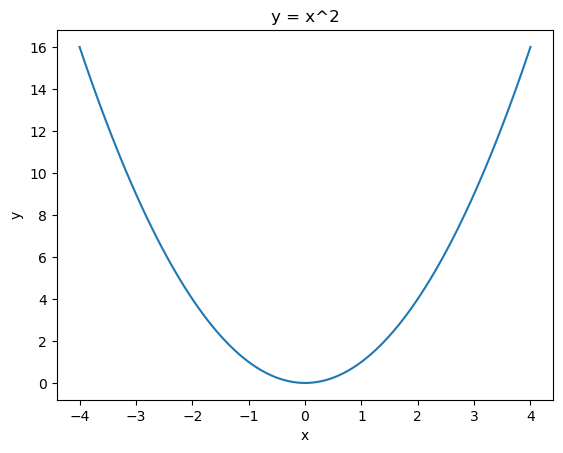

In [6]:
x = np.linspace(-4, 4, 100)
# print(x)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('y = x^2')
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0.5, 1.0, 'Bar Plot')

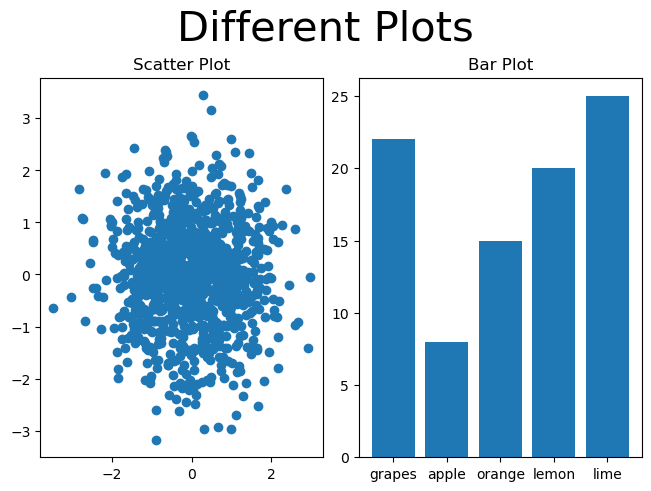

In [7]:
np.random.seed(15)
random_data_x = np.random.randn(1000)
random_data_y = np.random.randn(1000)
x = np.linspace(-2, 2, 100)
y = x**2

fruit_data = {'grapes': 22, 'apple': 8, 'orange': 15, 'lemon': 20, 'lime': 25}
names = list(fruit_data.keys())
values = list(fruit_data.values())

# Creating Subplots.
fig, axs = plt.subplots(1, 2,layout='constrained')
fig.suptitle('Different Plots', size = 30)

axs[0].scatter(random_data_x, random_data_y)
axs[0].set_title('Scatter Plot')

axs[1].bar(names, values)
axs[1].set_title('Bar Plot')

# Pandas

In [8]:
cars = pd.read_csv("cars_data.csv")

In [9]:
cars.head(10)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,6,audi,wagon,105.8,192.7,ohc,five,110,19,18920.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [11]:
cars.dropna(how = 'any', inplace = True)

In [12]:
cars.mean(numeric_only = True)

index                 40.827586
wheel-base            98.620690
length               173.646552
horsepower           106.051724
average-mileage       25.534483
price              15387.000000
dtype: float64

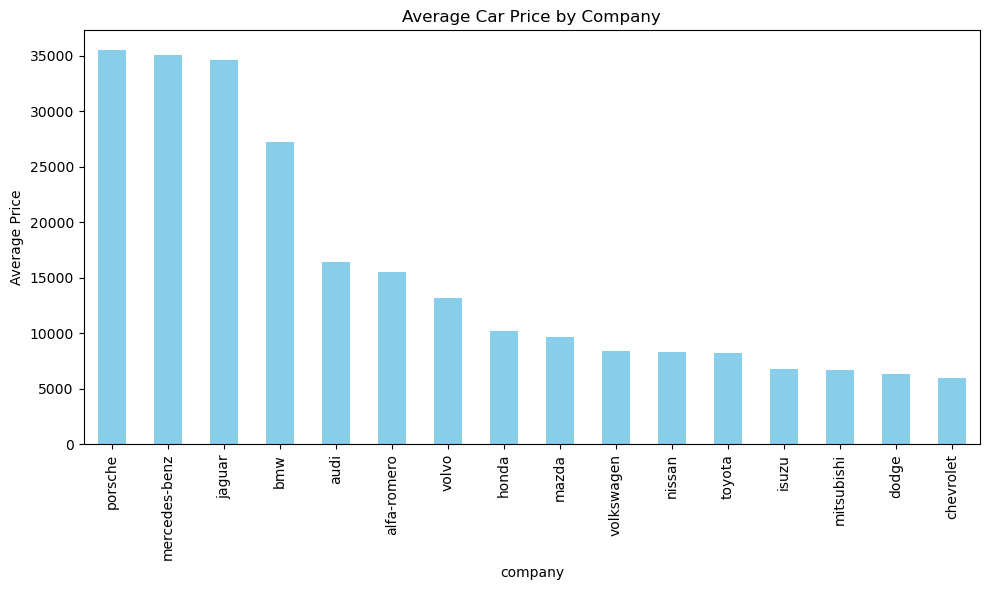

In [13]:
avg_price = cars.groupby("company")["price"].mean().sort_values(ascending=False)

# Plot
avg_price.plot(kind='bar', figsize=(10, 6), title='Average Car Price by Company', color='skyblue')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

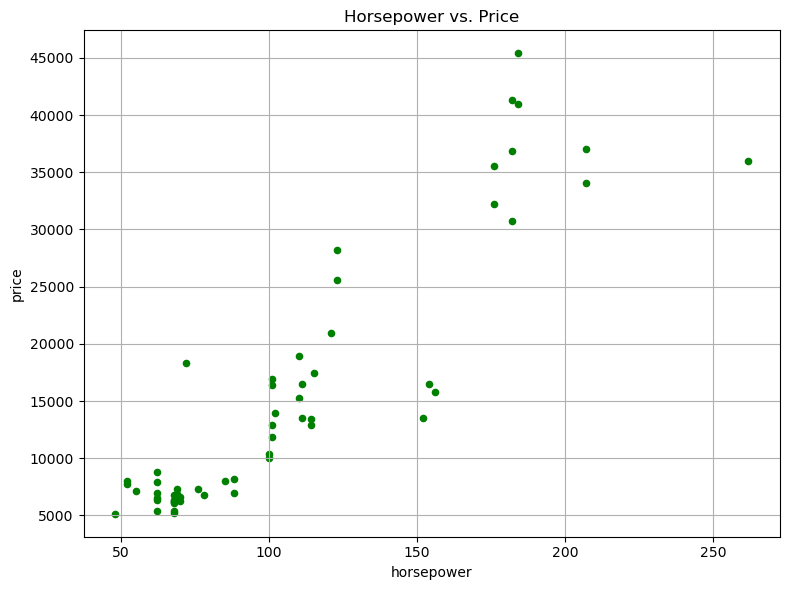

In [14]:
# Scatter plot
cars.plot(kind='scatter', x='horsepower', y='price', title='Horsepower vs. Price', color='green', figsize=(8,6))
plt.grid(True)
plt.tight_layout()
plt.show()
